# Challenge DATA 

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv('train_f_x.csv')
train

,date,station,job,ferie,vacances
0,2015-01-01,1J7,1,1,1
1,2015-01-01,O2O,1,1,1
2,2015-01-01,8QR,1,1,1
3,2015-01-01,UMC,1,1,1
4,2015-01-01,FK3,1,1,1
...,...,...,...,...,...
1229858,2022-12-31,V2P,0,0,1
1229859,2022-12-31,N9K,0,0,1
1229860,2022-12-31,P6E,0,0,1
1229861,2022-12-31,BDC,0,0,1


In [ ]:
from sklearn.preprocessing import LabelEncoder

df = train.copy()
# Initialiser le LabelEncoder
label_encoder = LabelEncoder()

# Spécifier la colonne à encoder (par exemple, "ColonneCible")
colonne_cible = 'station'
df[colonne_cible] = label_encoder.fit_transform(df[colonne_cible])

# Sauvegarder le DataFrame modifié si nécessaire
df.to_csv('fichier_modifie.csv', index=False)

print("Encodage terminé ! Voici un aperçu :")
print(df.head())

In [4]:
# Afficher le nombre de lignes et de colonnes
print(f"Nombre de lignes : {df.shape[0]}")
print(f"Nombre de colonnes : {df.shape[1]}")

# Afficher les noms des colonnes
print("\nNoms des colonnes :")
print(df.columns.tolist())

# Afficher le nombre d'éléments uniques dans chaque colonne
print("\nNombre d'éléments uniques par colonne :")
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"{col} : {unique_count} élément(s) unique(s)")

Nombre de lignes : 1229863
Nombre de colonnes : 5

Noms des colonnes :
['date', 'station', 'job', 'ferie', 'vacances']

Nombre d'éléments uniques par colonne :
date : 2922 élément(s) unique(s)
station : 439 élément(s) unique(s)
job : 2 élément(s) unique(s)
ferie : 2 élément(s) unique(s)
vacances : 2 élément(s) unique(s)


In [5]:
# Compter le nombre total de validations par station
validations_par_station = df['station'].value_counts().reset_index()

# Renommer les colonnes pour plus de clarté
validations_par_station.columns = ['station', 'nombre_validations']

# Afficher le résultat
print("Nombre total de validations par station :")
print(validations_par_station)

Nombre total de validations par station :
     station  nombre_validations
0        103                2922
1        126                2922
2        396                2922
3        284                2922
4        316                2922
..       ...                 ...
434      391                 182
435      310                 181
436      143                 181
437      395                 169
438      324                  70

[439 rows x 2 columns]


In [6]:
# Initialiser une structure pour stocker les résultats
resultats = []

# Parcourir les stations uniques
for station in df['station'].unique():
    sous_df = df[df['station'] == station]
    
    # Calculer les validations selon les critères
    nb_ferie = sous_df[sous_df['ferie'] == 1].shape[0]  # Jours fériés
    nb_vacances = sous_df[sous_df['vacances'] == 1].shape[0]  # Jours de vacances
    nb_job = sous_df[sous_df['job'].notna()].shape[0]  # Validation avec un job non nul
    
    # Ajouter les résultats dans la liste
    resultats.append({
        'station': station,
        'validations_ferie': nb_ferie,
        'validations_vacances': nb_vacances,
        'validations_job': nb_job
    })

# Convertir les résultats en DataFrame pour une visualisation facile
resultats_df = pd.DataFrame(resultats)

# Afficher les résultats
print("Nombre de validations par station selon les critères :")
print(resultats_df)

Nombre de validations par station selon les critères :
     station  validations_ferie  validations_vacances  validations_job
0         24                 79                   951             2745
1        295                 84                   964             2832
2        107                 86                   973             2854
3        367                 86                   987             2881
4        199                 82                   965             2800
..       ...                ...                   ...              ...
434      310                  5                    87              181
435      143                  5                    87              181
436      395                  4                    78              169
437      391                  5                    87              182
438      324                  1                    30               70

[439 rows x 4 columns]


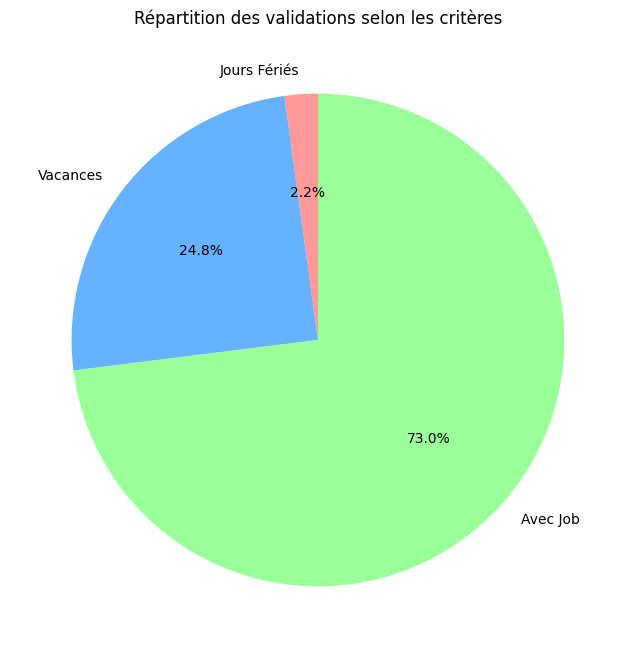

In [7]:
# Calculer le nombre total de validations pour chaque critère
total_ferie = df[df['ferie'] == 1].shape[0]  # Jours fériés
total_vacances = df[df['vacances'] == 1].shape[0]  # Jours de vacances
total_job = df[df['job'].notna()].shape[0]  # Validation avec un job renseigné

# Stocker les résultats dans une structure
labels = ['Jours Fériés', 'Vacances', 'Avec Job']
valeurs = [total_ferie, total_vacances, total_job]

# Création du graphique en camembert
plt.figure(figsize=(8, 8))
plt.pie(
    valeurs,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#FF9999', '#66B2FF', '#99FF99']
)
plt.title("Répartition des validations selon les critères")
plt.show()

In [8]:
print(valeurs)

[36725, 417626, 1229863]


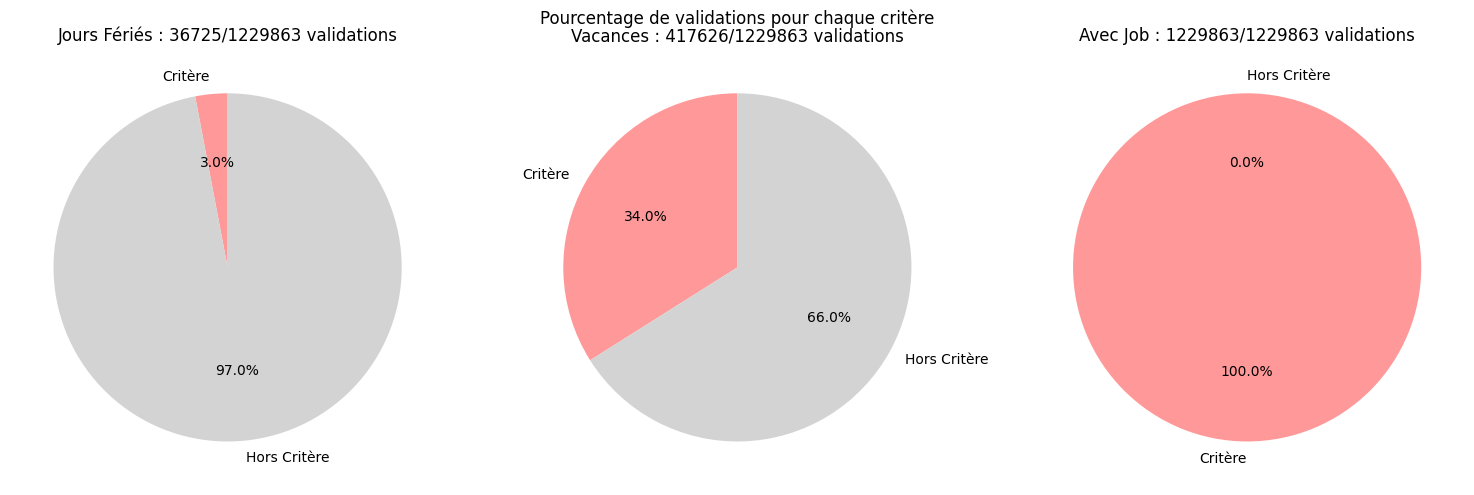

In [9]:
# Calculer le nombre total de validations et les validations pour chaque critère
total_validations = df.shape[0]
total_ferie = df[df['ferie'] == 1].shape[0]
total_vacances = df[df['vacances'] == 1].shape[0]
total_job = df[df['job'].notna()].shape[0]

# Préparer les données pour les camemberts
criteres = ['Jours Fériés', 'Vacances', 'Avec Job']
valeurs = [total_ferie, total_vacances, total_job]
labels = ['Critère', 'Hors Critère']  # Labels communs pour tous les camemberts
colors = ['#FF9999', '#D3D3D3']

# Création des trois graphiques en camembert
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, (valeur, critere) in enumerate(zip(valeurs, criteres)):
    axes[i].pie(
        [valeur, total_validations - valeur],
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors
    )
    axes[i].set_title(f"{critere} : {valeur}/{total_validations} validations")

# Ajuster l'affichage
plt.suptitle("Pourcentage de validations pour chaque critère")
plt.tight_layout()
plt.show()

## Le critère Job n'est pas révélateur puisqu'il est présent dans 100% des cas 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229863 entries, 0 to 1229862
Data columns (total 5 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   date      1229863 non-null  object
 1   station   1229863 non-null  int64 
 2   job       1229863 non-null  int64 
 3   ferie     1229863 non-null  int64 
 4   vacances  1229863 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 46.9+ MB


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanAbsolutePercentageError

2025-01-13 22:31:38.206277: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-13 22:31:38.217264: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-13 22:31:38.249958: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736803898.300327 2054204 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736803898.315749 2054204 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
# Créer les caractéristiques (X) et la cible (y)
X = df[['station', 'ferie', 'vacances', 'job']].values
y = df.groupby(['date', 'station']).size().values  # Nombre de validations par jour/station

# Normaliser les caractéristiques pour le modèle
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Création du modèle de réseau de neurones dense
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Une seule sortie pour prédire le nombre de validations
])

# Compilation du modèle
model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanAbsolutePercentageError(), metrics=['MAE'])

# Entraînement du modèle
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=1)

# Évaluation du modèle
loss, mape = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Absolute Percentage Error sur l'ensemble de test : {mae:.2f}%")

# Prédictions
y_pred = model.predict(X_test)

/usr/local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-01-13 22:31:55.901130: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/20
30745/30747 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - MAE: 0.0112 - loss: 1.1201

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,301 (28.52 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,868 (19.02 KB)

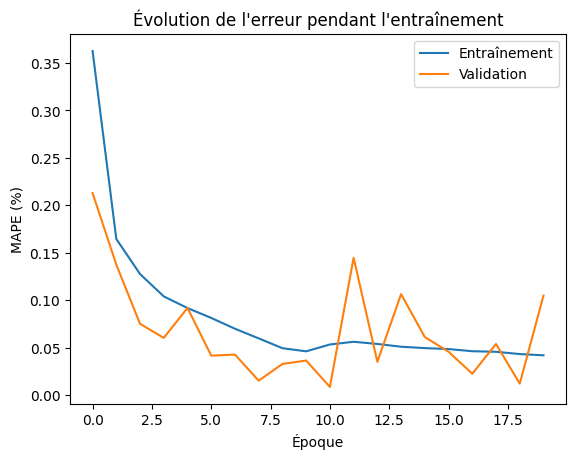

In [17]:
# Visualisation des performances
plt.plot(history.history['mape'], label='Entraînement')
plt.plot(history.history['val_mape'], label='Validation')
plt.xlabel('Époque')
plt.ylabel('MAE (%)')
plt.title("Évolution de l'erreur pendant l'entraînement")
plt.legend()
plt.show()

In [19]:
train_loss, train_mape = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_mape = model.evaluate(X_test, y_test, verbose=0)

print(f"Erreur sur l'entraînement (MAPE) : {train_mape:.2f}%")
print(f"Erreur sur le test (MAPE) : {test_mape:.2f}%")

if test_mape > train_mape * 1.5:  # Exemple : Test 50% plus mauvais qu'entraînement
    print("Le modèle montre des signes de surentraînement.")

Erreur sur l'entraînement (MAPE) : 0.01%
Erreur sur le test (MAPE) : 0.01%


## Ajout de plusieurs phase d'entrainement du modele 

In [20]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, verbose=1)

Epoch 1/10
30747/30747 ━━━━━━━━━━━━━━━━━━━━ 194s 6ms/step - loss: 0.0402 - mape: 0.0402 - val_loss: 0.0417 - val_mape: 0.0417
Epoch 2/10
30747/30747 ━━━━━━━━━━━━━━━━━━━━ 200s 7ms/step - loss: 0.0405 - mape: 0.0405 - val_loss: 0.0043 - val_mape: 0.0043
Epoch 3/10
30747/30747 ━━━━━━━━━━━━━━━━━━━━ 200s 6ms/step - loss: 0.0339 - mape: 0.0339 - val_loss: 0.0086 - val_mape: 0.0086
Epoch 4/10
30747/30747 ━━━━━━━━━━━━━━━━━━━━ 174s 6ms/step - loss: 0.0327 - mape: 0.0327 - val_loss: 0.0084 - val_mape: 0.0084
Epoch 5/10
30747/30747 ━━━━━━━━━━━━━━━━━━━━ 114s 4ms/step - loss: 0.0331 - mape: 0.0331 - val_loss: 0.0680 - val_mape: 0.0680
Epoch 6/10
30747/30747 ━━━━━━━━━━━━━━━━━━━━ 113s 4ms/step - loss: 0.0314 - mape: 0.0314 - val_loss: 0.0084 - val_mape: 0.0084
Epoch 7/10
30747/30747 ━━━━━━━━━━━━━━━━━━━━ 115s 4ms/step - loss: 0.0301 - mape: 0.0301 - val_loss: 0.0043 - val_mape: 0.0043
Epoch 8/10
30747/30747 ━━━━━━━━━━━━━━━━━━━━ 110s 4ms/step - loss: 0.0307 - mape: 0.0307 - val_loss: 0.0424 - val_mape:

In [22]:
loss, mape = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Absolute Percentage Error sur l'ensemble de test : {mape:.2f}%")

Mean Absolute Percentage Error sur l'ensemble de test : 0.03%


In [32]:
# Charger le fichier de test
df_test = pd.read_csv('test_f_x_THurtzP.csv')


# Encodage des colonnes catégoriques (assurez-vous d'utiliser les mêmes encodages qu'à l'entraînement)
label_encoders = {}
for col in ['station', 'job']:
    le = LabelEncoder()
    df_test[col] = le.fit_transform(df_test[col].astype(str))
    label_encoders[col] = le

# Préparer les caractéristiques pour la prédiction
X_test = df_test[['station', 'ferie', 'vacances', 'job']].values

# Charger le scaler utilisé lors de l'entraînement
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)  # Utiliser le scaler configuré lors de l'entraînement

# Prédire les validations
y_pred = model.predict(X_test)

# Ajouter les prédictions au fichier de test
df_test['predicted_validations'] = y_pred

# Sauvegarder le fichier avec les prédictions
df_test.to_csv('test_with_predictions.csv', index=False)

print("Prédictions effectuées et sauvegardées dans 'test_with_predictions.csv'.")

2458/2458 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Prédictions effectuées et sauvegardées dans 'test_with_predictions.csv'.


In [ ]:
import tensorflow as tf

def mape_loss(y_true, y_pred):
    """
    Fonction de perte basée sur le Mean Absolute Percentage Error (MAPE).
    
    Arguments :
    - y_true : Tensor contenant les valeurs réelles (valeurs observées).
    - y_pred : Tensor contenant les valeurs prédites par le modèle.
    
    Retourne :
    - La perte MAPE sous forme de valeur scalaire.
    """
    # Éviter les divisions par zéro en ajoutant une petite valeur epsilon
    epsilon = tf.keras.backend.epsilon()
    y_true = tf.maximum(y_true, epsilon)  # Assurer que y_true >= epsilon
    return tf.reduce_mean(tf.abs((y_true - y_pred) / y_true)) * 100


In [ ]:
model.compile(optimizer='adam', loss=mape_loss, metrics=['mape'])


In [ ]:
# Exemple de données
y_true = tf.constant([100, 200, 300], dtype=tf.float32)
y_pred = tf.constant([110, 190, 290], dtype=tf.float32)

# Calcul de la perte
loss = mape_loss(y_true, y_pred)
print(f"MAPE Loss: {loss.numpy():.2f}%")


In [ ]:
# ---- Évaluation ----
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Précision sur le dataset de test : {test_accuracy:.2f}")

# ---- Courbes d'évolution ----
plt.figure(figsize=(12, 4))

# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perte d\'entraînement')
plt.plot(history.history['val_loss'], label='Perte de validation')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.title('Évolution de la perte')
plt.legend()

# Courbe de précision
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Précision d\'entraînement')
plt.plot(history.history['val_accuracy'], label='Précision de validation')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.title('Évolution de la précision')
plt.legend()

plt.tight_layout()
plt.show()